In [35]:
# import some stuff
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations


In [3]:
# Question 1

# # number of hash functions t
# t = 160

# b - the length of a band
b = 31
# the number of super Hash functions with band length b
r = 5

# calculate the probabilities using the function f(s) = 1 - (1 - s^b)^r
AB = 1 - ((1 - (0.77 ** b)) ** r)
AC = 1 - ((1 - (0.25 ** b)) ** r)
AD = 1 - ((1 - (0.33 ** b)) ** r)
BC = 1 - ((1 - (0.20 ** b)) ** r)
BD = 1 - ((1 - (0.55 ** b)) ** r)
CD = 1 - ((1 - (0.91 ** b)) ** r)

# generate the results
print(f"The probability for AB having a collision is: {AB}")
print(f"The probability for AC having a collision is: {AC}")
print(f"The probability for AD having a collision is: {AD}")
print(f"The probability for BC having a collision is: {BC}")
print(f"The probability for BD having a collision is: {BD}")
print(f"The probability for CD having a collision is: {CD}")


The probability for AB having a collision is: 0.0015132805203282862
The probability for AC having a collision is: 0.0
The probability for AD having a collision is: 6.106226635438361e-15
The probability for BC having a collision is: 0.0
The probability for BD having a collision is: 4.469031067433349e-08
The probability for CD having a collision is: 0.24132368169089802


In [22]:
# function that builds a unit vector of d dimension
def build_unit_vector(d):
    # list that stores the components of the vectors
    vector_components = []
    for _ in range(d//2 + 1):
        u1, u2 = np.random.uniform(size = 2)
        sqrt_expression = -2 * np.log(u1)
        odd_coordinate = (np.sqrt(sqrt_expression)) * np.cos(2 * np.pi * u2)
        even_coordinate = (np.sqrt(sqrt_expression)) * np.sin(2 * np.pi * u2)
        vector_components.append(odd_coordinate)
        vector_components.append(even_coordinate)
    vector = np.array(vector_components)
    resultant_vector = vector[:d]
    magnitude = np.sqrt(np.sum(np.power(resultant_vector, 2)))
    resultant_vector /= magnitude
    return resultant_vector

In [33]:
# function that generates p random unit vectors of d dimension
def generate_random_unit_vector(p, d):
    # list for storing p vectors
    vector_list = []
    for _ in range(p):
        unit_vector = build_unit_vector(d)
        vector_list.append(unit_vector)
    return vector_list           

12720
0.3829161613626936


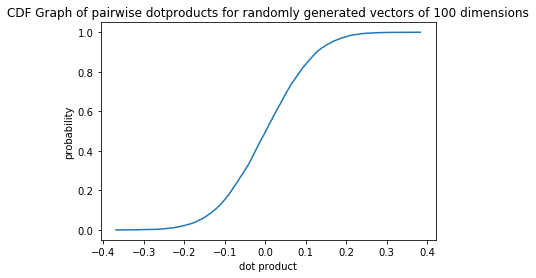

In [63]:
# Question 2
# Part A
single_unit_vector = generate_random_unit_vector(1, 10)

# Part B
unit_vectors_list = generate_random_unit_vector(160, 100)

# generate combinations for 160 C 2 = 12720
vector_combinations = list(combinations(range(160), 2))

# list that stores all the dot products
dot_product_list = []
for g in range(len(vector_combinations)):
    vectors = vector_combinations[g]
#     print("vectors")
    vector_1_index = vectors[0]
    vector_2_index = vectors[1]
#     print(" vector indexes")
    vector_1 = unit_vectors_list[vector_1_index]
    vector_2 = unit_vectors_list[vector_2_index]
    dot_product = vector_1.dot(vector_2)
    dot_product_list.append(dot_product)
    
# print(len(vector_combinations))
# print(len(dot_product_list))

vals, bin_value = np.histogram(dot_product_list, bins = 12720)
cdf = np.cumsum(vals)
cdf = cdf / 12720


plt.title("CDF Graph of pairwise dotproducts for randomly generated vectors of 100 dimensions")
plt.xlabel("dot product")
plt.ylabel("probability")
plt.plot(bin_value[:-1], cdf)
plt.show()




In [72]:
# Question 3
vectors = np.loadtxt('R.csv', delimiter = ',')
# print(vectors)
vectors.shape

(500, 100)

In [145]:
# function that generates large unit vectors and returns them in a list
def generate_large_unit_vectors(vectors_list):
    # list for storing unit vectors
    unit_vector_list = []
    for g in range(len(vectors_list)):
        magnitude = np.linalg.norm(vectors_list[g])
        vectors_list[g] /= magnitude
        unit_vector_list.append(vectors_list[g])
    return unit_vector_list

500


In [158]:
# function that determines angular similarity between two vectors a and b
def angular_similarity(a, b):
    vector_angular_similarity = 1 - (1 / np.pi) * np.arccos(a.dot(b))
    return vector_angular_similarity

124750


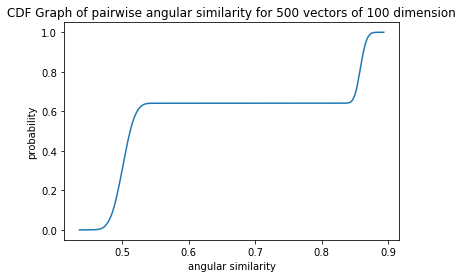

In [165]:
# Question 3A

# combinations of vectors for angular similarity
angular_combinations = list(combinations(range(500), 2))

# generate unit vectors
angular_unit_vectors_list = generate_large_unit_vectors(vectors)

# list that stores the result of angular similarity
angular_similarity_list = []
for h in range(len(angular_combinations)):
    angular_vectors = angular_combinations[h]
#     print("vectors")
    vector_a_index = angular_vectors[0]
    vector_b_index = angular_vectors[1]
#     print(" vector indexes")
    vector_a = angular_unit_vectors_list[vector_a_index]
    vector_b = angular_unit_vectors_list[vector_b_index]
    
    vector_angular_similarity = angular_similarity(vector_a, vector_b)
    angular_similarity_list.append(vector_angular_similarity)
    
print(len(angular_similarity_list))
# print(angular_similarity_list)

angular_vals, angular_bin_value = np.histogram(angular_similarity_list, bins = 124750)
cdf = np.cumsum(angular_vals)
cdf = cdf / 124750



plt.title("CDF Graph of pairwise angular similarity for 500 vectors of 100 dimension")
plt.xlabel("angular similarity")
plt.ylabel("probability")
plt.plot(angular_bin_value[:-1], cdf)
plt.show()




    



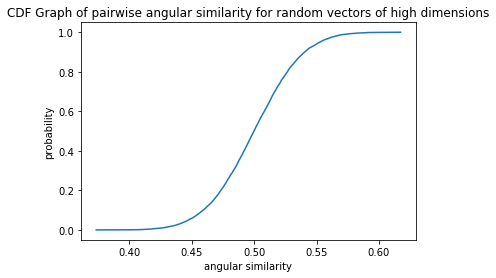

In [166]:
# Question 3B
angular_random_unit_vectors_list = generate_random_unit_vector(160, 100)

# angular combinations for similarity 
angular_vector_combinations = list(combinations(range(160), 2))

# list that stores all the dot products
random_angular_list = []
for t in range(len(angular_vector_combinations)):
    angular_random_vectors = angular_vector_combinations[t]
    angular_random_vector_a_index = angular_random_vectors[0]
    angular_random_vector_b_index = angular_random_vectors[1]
    angular_random_vector_a = angular_random_unit_vectors_list[angular_random_vector_a_index]
    angular_random_vector_b = angular_random_unit_vectors_list[angular_random_vector_b_index]
    
    random_vector_angular_similarity = angular_similarity(angular_random_vector_a, angular_random_vector_b)
    random_angular_list.append(random_vector_angular_similarity)
    


random_angular_vals, random_angular_bin_value = np.histogram(random_angular_list, bins = 12720)
cdf = np.cumsum(random_angular_vals)
cdf = cdf / 12720

plt.title("CDF Graph of pairwise angular similarity for random vectors of high dimensions")
plt.xlabel("angular similarity")
plt.ylabel("probability")
plt.plot(random_angular_bin_value[:-1], cdf)
plt.show()

